### Crypto Coin Simulation
*Continuous-Time Representation*

This first simulation is just a standard crypto curencie with market volatility (fluctuation).

The price dynamics in continuous time can be expressed as a stochastic differential equation:

$$
\frac{dP}{dt} = \sigma P \, \eta(t)
$$

**Where:**
- **$P$** is the price of the cryptocurrency.
- **$\sigma$** is the volatility coefficient.
- **$\eta(t)$** represents a random noise process (e.g., white noise).

*Discrete-Time Simulation*

For simulation purposes, we use a discrete-time version of the model:

$$
P[t] = P[t-1] \times (1 + \epsilon[t])
$$

Where:
- **$P_t$** is the price at time step $t$.
- **$P_{t-1}$** is the price at the previous time step.
- **$\epsilon_t$** is a random percentage change, typically drawn from a normal distribution, i.e.,

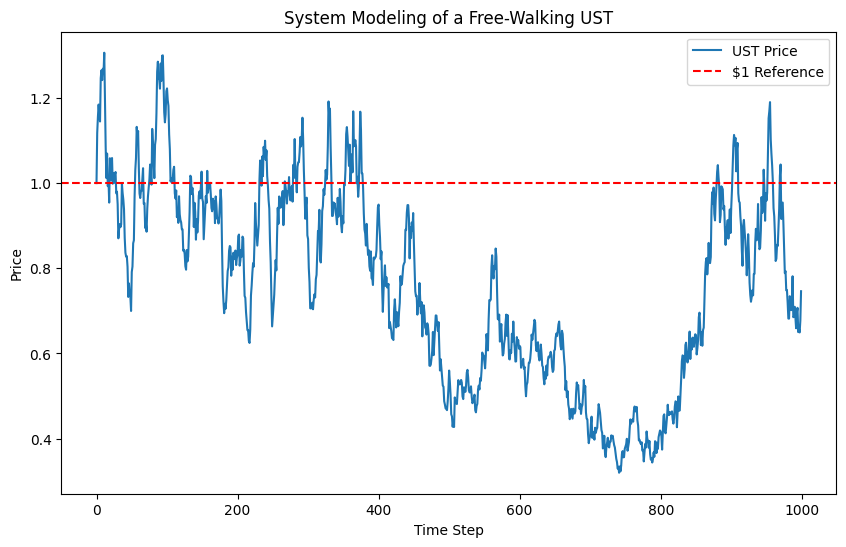

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1000                   # Number of time steps
price = np.zeros(T)        # Array to store UST price at each time step
price[0] = 1.0             # Starting price for UST
UST_volatility = 0.05          # Volatility factor (5% standard deviation per time step)

# Simulate price evolution as a free-walking cryptocurrency
for t in range(1, T):
    pct_change = np.random.normal(0, UST_volatility)    # Random percentage change
    price[t] = price[t-1] * (1 + pct_change)        # discrete-time equation

# Plot the results with a reference line at $1
plt.figure(figsize=(10, 6))
plt.plot(price, label='UST Price')
plt.axhline(1.0, color='red', linestyle='--', label='$1 Reference')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.title('System Modeling of a Free-Walking UST')
plt.legend()
plt.show()



### System Modeling of a Cryptocurrency with Supply Effects

Now we have introduced a market cap with a the supply of the coin
the market cap in $50 000, and with 1000 coins, each coin is worth $50 initialy.

The initial price of the coin is no longer hard set. It is based on the Market Cap of the coin:

*Market Cap*

$$
MC_t = P_t \times S_t
$$

**Where:**
- **$MC_t$** is the market cap at time step $t$.
- **$P_t$** is the price of the cryptocurrency at time step $t$.
- **$S_t$** is the supply (number of tokens) at time step $t$.

The market volatility is made by manipulating the market cap itself, and not the price of each individual coins. This is done so the price of the coin is affected by the supply, not the market cap.

This simulation's continous time equation is almost the same as the first simulation, as the supply is a fixed variable.

*Continous Time Equation*

$$
\frac{dP(t)}{dt} = \sigma \, P(t) \, dW_t
$$

**Where:**
- **$P(t)$** is the price of the cryptocurrency at time $t$.
- **$\sigma$** is the volatility coefficient.
- **$dW_t$** represents an incremental Wiener process (e.g., white noise).

*Descrite Time Equation*

$$
P_t = P_{t-1} \times (1 + \epsilon_t)
$$

**Where:**
- **$P_t$** is the price of the cryptocurrency at time step $t$.
- **$P_{t-1}$** is the price of the cryptocurrency at the previous time step.
- **$\epsilon_t$** is a random percentage change at time $t$, with $\epsilon_t \sim \mathcal{N}(0, v)$.

In this simulation we sudenly increase the market cap to see what happens to the coin. In this case, the price of the coin halves.

*Supply Shock Price Adjustment Equation*

$$
P_{\text{shock}} = P_{\text{before}} \times \frac{S_{\text{old}}}{S_{\text{new}}}
$$

**Where:**
- **$P_{\text{shock}}$** is the price immediately after the supply shock.
- **$P_{\text{before}}$** is the price immediately before the supply shock.
- **$S_{\text{old}}$** is the supply before the shock.
- **$S_{\text{new}}$** is the supply after the shock.


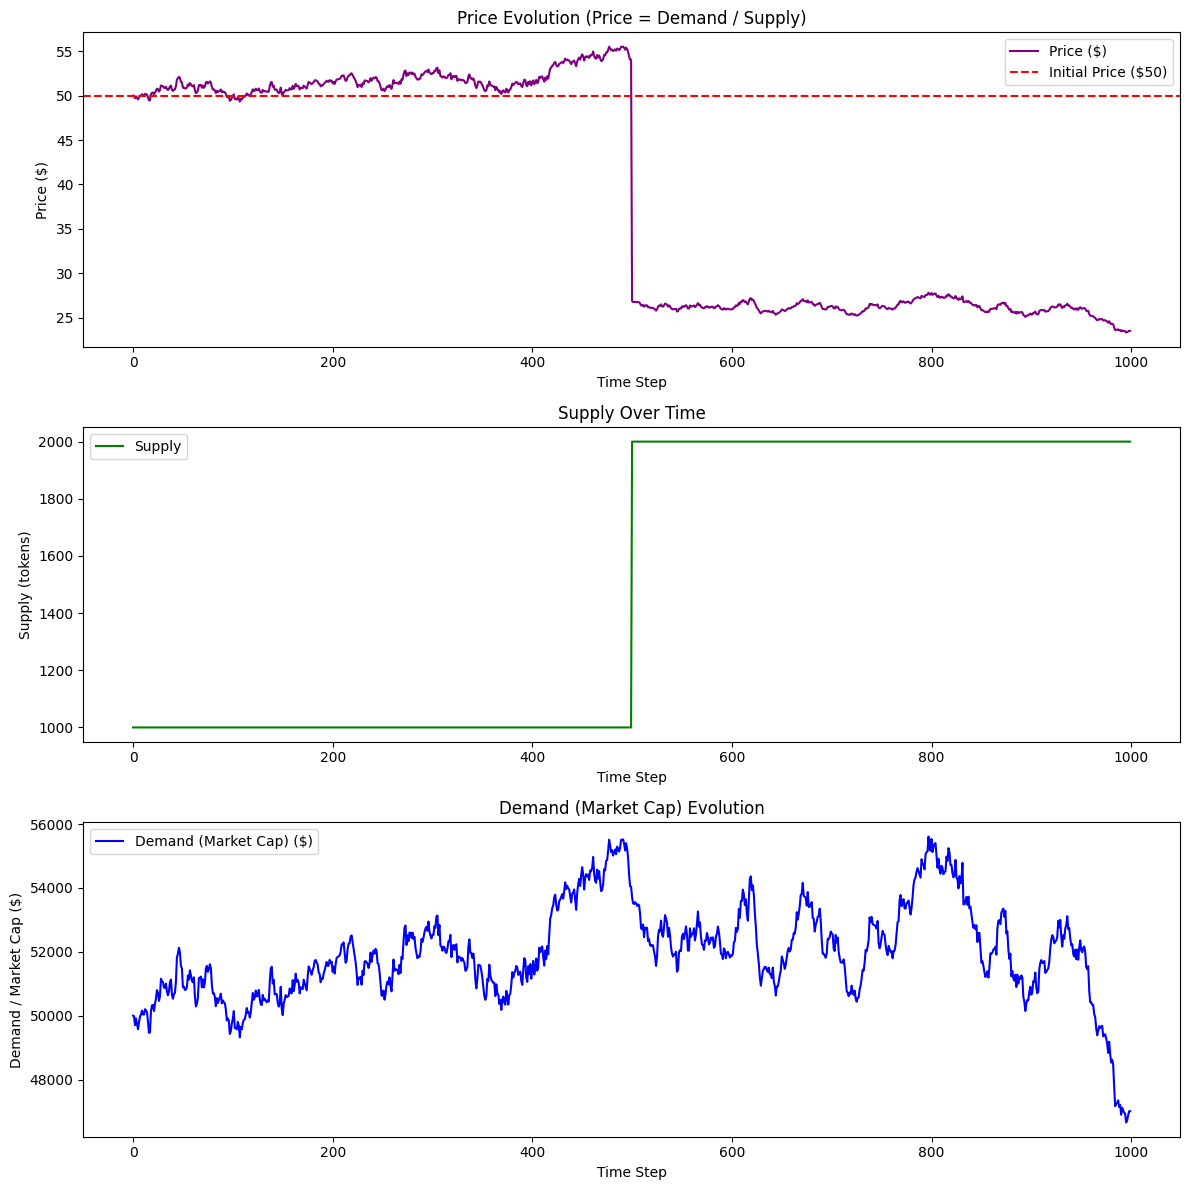

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1000                              # Total number of time steps
UST_volatility = 0.005                    # Volatility factor for demand noise
demand = np.zeros(T)                  # Array for demand (i.e. market cap)
demand[0] = 50000.0                   # Initial demand of $50,000

# Supply parameters
initial_supply = 1000                 # Initial number of tokens
new_supply = 2000                     # Supply after the shock
shock_time = T // 2                   # Supply shock occurs halfway through
supply = np.full(T, initial_supply)   # Initialize supply array
supply[shock_time:] = new_supply      # Apply the supply shock

# Price is determined by Demand / Supply.
price = np.zeros(T)
price[0] = demand[0] / supply[0]      # Initial price = 50000 / 1000 = $50

# Simulate the evolution of demand (market cap) and compute price accordingly.
for t in range(1, T):
    epsilon = np.random.normal(0, UST_volatility)
    demand[t] = demand[t-1] * (1 + epsilon)
    price[t] = demand[t] / supply[t]

# Plotting the results
plt.figure(figsize=(12, 12))

# Price Evolution Plot
plt.subplot(3, 1, 1)
plt.plot(price, label='Price ($)', color='purple')
plt.axhline(50, color='red', linestyle='--', label='Initial Price ($50)')
plt.xlabel('Time Step')
plt.ylabel('Price ($)')
plt.title('Price Evolution (Price = Demand / Supply)')
plt.legend()

# Supply Plot
plt.subplot(3, 1, 2)
plt.plot(supply, label='Supply', color='green')
plt.xlabel('Time Step')
plt.ylabel('Supply (tokens)')
plt.title('Supply Over Time')
plt.legend()

# Demand (Market Cap) Plot
plt.subplot(3, 1, 3)
plt.plot(demand, label='Demand (Market Cap) ($)', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Demand / Market Cap ($)')
plt.title('Demand (Market Cap) Evolution')
plt.legend()

plt.tight_layout()
plt.show()


### Simualtion of a Cryptocurrencie with Arbitrage

Now we will try to stabelize the price of the coin by manipulating the supply. The price of the coin will fluctuate, which the market cap will also fluctuate.

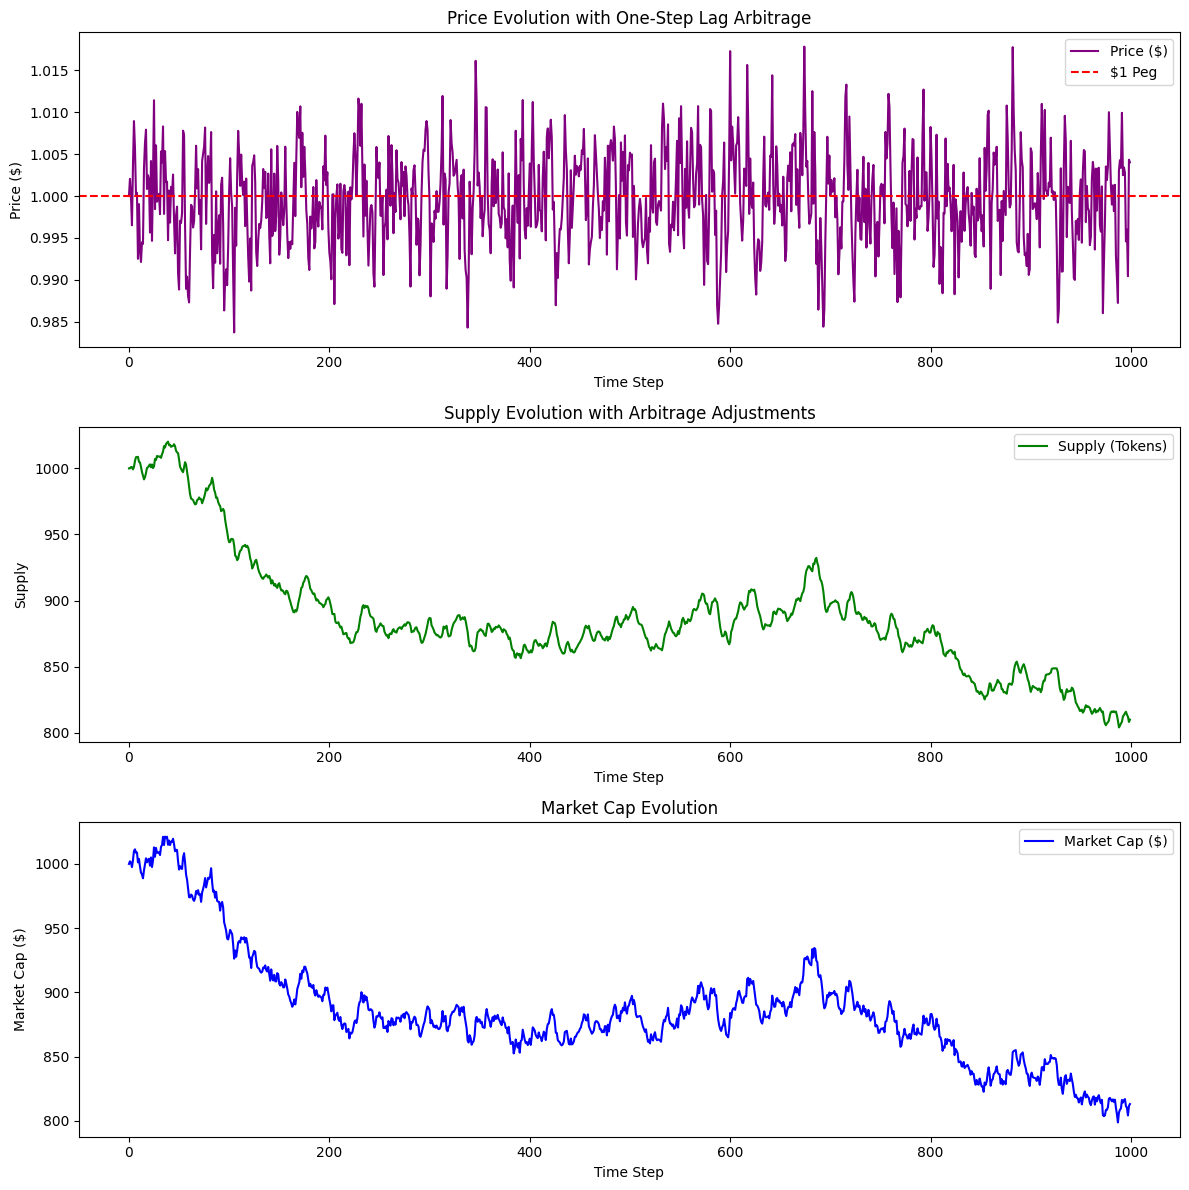

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1000                             # Total number of time steps
UST_volatility = 0.005                   # Volatility factor for order flow (price noise)
arbitrage_power = 0.5                          # Arbitrage adjustment factor (0 < alpha <= 1)

# Initialize arrays
UST_MC = np.zeros(T)                     # Market cap array
UST_S = np.zeros(T)                      # Supply array
UST_P = np.zeros(T)                      # Price array

# Initial conditions: peg at $1, with constant market cap and supply
UST_MC[0] = 1000.0                       # Initial market cap ($1000)
UST_S[0] = 1000                          # Initial supply (1000 tokens)
UST_P[0] = UST_MC[0] / UST_S[0]                  # Initial price = $1

# Simulation loop
for t in range(1, T):
    # 1. Update market cap due to order flow (trading activity)
    epsilon = np.random.normal(0, UST_volatility)
    UST_MC[t] = UST_MC[t-1] * (1 + epsilon)
    
    # 2. Update supply based on the previous price deviation (arbitrage correction)
    UST_S[t] = UST_S[t-1] * (1 + arbitrage_power * (UST_P[t-1] - 1))
    
    # 3. Compute the new price from updated market cap and supply
    UST_P[t] = UST_MC[t] / UST_S[t]

# Plotting the results with three subplots
plt.figure(figsize=(12, 12))

# Price Evolution Plot
plt.subplot(3, 1, 1)
plt.plot(UST_P, label='Price ($)', color='purple')
plt.axhline(1, color='red', linestyle='--', label='$1 Peg')
plt.title('Price Evolution with One-Step Lag Arbitrage')
plt.xlabel('Time Step')
plt.ylabel('Price ($)')
plt.legend()

# Supply Evolution Plot
plt.subplot(3, 1, 2)
plt.plot(UST_S, label='Supply (Tokens)', color='green')
plt.title('Supply Evolution with Arbitrage Adjustments')
plt.xlabel('Time Step')
plt.ylabel('Supply')
plt.legend()

# Market Cap Evolution Plot
plt.subplot(3, 1, 3)
plt.plot(UST_MC, label='Market Cap ($)', color='blue')
plt.title('Market Cap Evolution')
plt.xlabel('Time Step')
plt.ylabel('Market Cap ($)')
plt.legend()

plt.tight_layout()
plt.show()


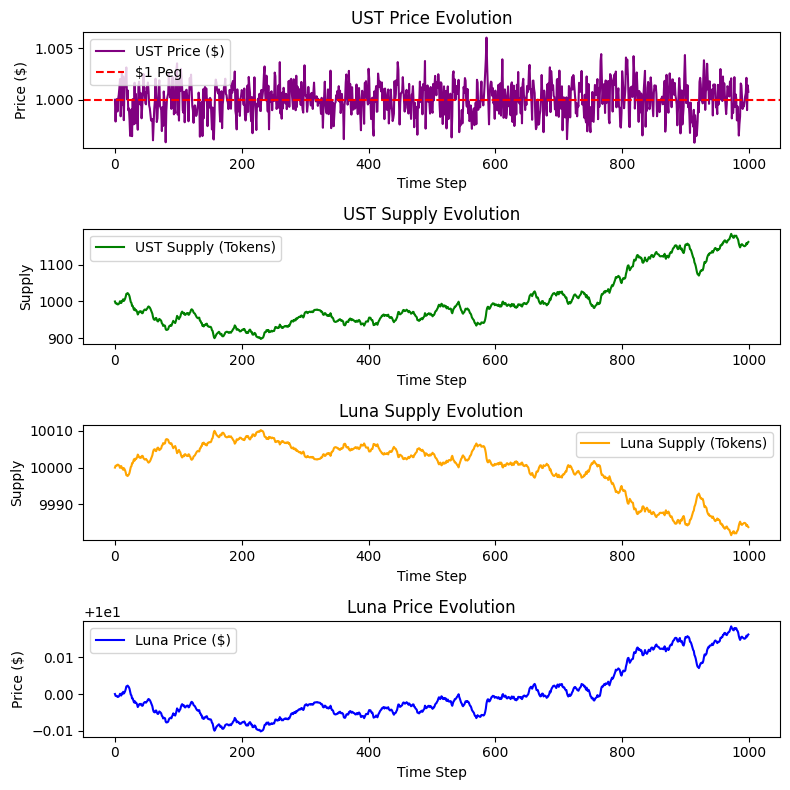

In [7]:
import numpy as np
import matplotlib.pyplot as plt

############################
# Helper function
############################
def adjust_for_peg(ust_price, ust_supply, luna_supply, luna_price, alpha):
    """
    Adjust the UST and LUNA supply so that if UST is above $1, we mint UST and burn LUNA.
    If UST is below $1, we burn UST and mint LUNA.

    ust_price   : current UST price
    ust_supply  : current UST supply
    luna_supply : current LUNA supply
    luna_price  : current LUNA price
    alpha       : how strongly to correct away from $1 peg

    returns: (new_ust_supply, new_luna_supply)
    """
    # 1. Determine how far we are from the $1 peg, scaled by alpha
    #    For example, if ust_price=1.02, (ust_price-1)=0.02 => we want to mint some fraction of UST.
    delta_ust = alpha * (ust_price - 1.0) * ust_supply

    # 2. The minted/burned UST is effectively $delta_ust if we treat each token as $1.
    #    We burn or mint an equivalent dollar value of LUNA.
    #    minted/burned LUNA = delta_ust / luna_price
    delta_luna = delta_ust / luna_price

    # 3. Update supplies:
    #    If delta_ust > 0 => UST minted => LUNA burned (luna_supply - ...)
    #    If delta_ust < 0 => UST burned => LUNA minted (luna_supply + ...)
    new_ust_supply = ust_supply + delta_ust
    new_luna_supply = luna_supply - delta_luna

    return new_ust_supply, new_luna_supply


############################
# Simulation parameters
############################
T = 1000                             # Total number of time steps
UST_volatility = 0.005               # Volatility factor for UST order flow
arbitrage_power = 0.7                # Arbitrage adjustment factor
LUNA_volatility = 0                # Volatility factor for LUNA market cap, set to 0

# Initialize arrays for UST
UST_MC = np.zeros(T)                 # UST Market cap array
UST_S  = np.zeros(T)                 # UST Supply array
UST_P  = np.zeros(T)                 # UST Price array

# Initialize arrays for Luna
LUNA_S  = np.zeros(T)                # LUNA Supply array
LUNA_P  = np.zeros(T)                # LUNA Price array
LUNA_MC = np.zeros(T)                # LUNA Market cap array


############################
# Initial conditions
############################
# UST pegged at $1 initially
UST_MC[0] = 1000.0                   # Initial UST market cap ($1000)
UST_S[0]  = 1000                     # Initial UST supply
UST_P[0]  = UST_MC[0] / UST_S[0]     # = 1

# LUNA starts at $10
LUNA_S[0]  = 10000
LUNA_P[0]  = 10.0
LUNA_MC[0] = LUNA_S[0] * LUNA_P[0]


############################
# Main simulation loop
############################
for t in range(1, T):
    # 1. Update UST market cap due to order flow (trading activity)
    epsilon = np.random.normal(0, UST_volatility) 
    UST_MC[t] = UST_MC[t-1] * (1 + epsilon) 

    # 2. Compute an intermediate UST price (before mint/burn) based on the new market cap
    current_ust_price = UST_MC[t] / UST_S[t-1]

    # 3. Adjust supplies (both UST and LUNA) to move UST price toward $1
    new_ust_supply, new_luna_supply = adjust_for_peg(
        ust_price=current_ust_price,
        ust_supply=UST_S[t-1],
        luna_supply=LUNA_S[t-1],
        luna_price=LUNA_P[t-1],
        alpha=arbitrage_power
    )

    # Store updated supplies
    UST_S[t] = new_ust_supply
    LUNA_S[t] = new_luna_supply

    # 4. Recompute UST price after the supply changes
    UST_P[t] = UST_MC[t] / UST_S[t]

    # 5. Update LUNA market cap (with zero volatility now)
    eta = np.random.normal(0, LUNA_volatility)
    LUNA_MC[t] = LUNA_MC[t-1] * (1 + eta)

    # 6. Update LUNA price based on its new supply
    LUNA_P[t] = LUNA_MC[t] / LUNA_S[t]


############################
# Plotting the results
############################
plt.figure(figsize=(8, 8))

# 1) UST Price Evolution
plt.subplot(4, 1, 1)
plt.plot(UST_P, label='UST Price ($)', color='purple')
plt.axhline(1, color='red', linestyle='--', label='$1 Peg')
plt.title('UST Price Evolution')
plt.xlabel('Time Step')
plt.ylabel('Price ($)')
#plt.ylim(0, 1.3)
plt.legend()

# 2) UST Supply Evolution
plt.subplot(4, 1, 2)
plt.plot(UST_S, label='UST Supply (Tokens)', color='green')
plt.title('UST Supply Evolution')
plt.xlabel('Time Step')
plt.ylabel('Supply')
plt.legend()

# 3) Luna Supply Evolution
plt.subplot(4, 1, 3)
plt.plot(LUNA_S, label='Luna Supply (Tokens)', color='orange')
plt.title('Luna Supply Evolution')
plt.xlabel('Time Step')
plt.ylabel('Supply')
plt.legend()

# 4) Luna Price Evolution
plt.subplot(4, 1, 4)
plt.plot(LUNA_P, label='Luna Price ($)', color='blue')
plt.title('Luna Price Evolution')
plt.xlabel('Time Step')
plt.ylabel('Price ($)')
plt.legend()

plt.tight_layout()
plt.show()
